In [1]:
import os
import pathlib
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
!ls ../input/

arch				scalar_coupling_contributions.csv
dipole_moments.csv		structures
magnetic_shielding_tensors.csv	structures.csv
mulliken_charges.csv		test.csv
potential_energy.csv		train.csv
sample_submission.csv


In [4]:
train_df = pd.read_csv('../input/train.csv')

In [5]:
dipole_moments_df = pd.read_csv('../input/dipole_moments.csv')

In [6]:
magnetic_shielding_tensors_df = pd.read_csv('../input/magnetic_shielding_tensors.csv')

In [7]:
mulliken_charges_df = pd.read_csv('../input/mulliken_charges.csv')

In [8]:
potential_energy_df = pd.read_csv('../input/potential_energy.csv')

In [9]:
scalar_coupling_contributions_df = pd.read_csv('../input/scalar_coupling_contributions.csv')

In [10]:
structures_df = pd.read_csv('../input/structures.csv')

In [11]:
test_df = pd.read_csv('../input/test.csv')

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658147 entries, 0 to 4658146
Data columns (total 6 columns):
id                          int64
molecule_name               object
atom_index_0                int64
atom_index_1                int64
type                        object
scalar_coupling_constant    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.2+ MB


In [13]:
train_df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [14]:
dipole_moments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85003 entries, 0 to 85002
Data columns (total 4 columns):
molecule_name    85003 non-null object
X                85003 non-null float64
Y                85003 non-null float64
Z                85003 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.6+ MB


In [15]:
dipole_moments_df.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [16]:
magnetic_shielding_tensors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533537 entries, 0 to 1533536
Data columns (total 11 columns):
molecule_name    1533537 non-null object
atom_index       1533537 non-null int64
XX               1533537 non-null float64
YX               1533537 non-null float64
ZX               1533537 non-null float64
XY               1533537 non-null float64
YY               1533537 non-null float64
ZY               1533537 non-null float64
XZ               1533537 non-null float64
YZ               1533537 non-null float64
ZZ               1533537 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 128.7+ MB


In [17]:
magnetic_shielding_tensors_df.head()

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [18]:
mulliken_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533537 entries, 0 to 1533536
Data columns (total 3 columns):
molecule_name      1533537 non-null object
atom_index         1533537 non-null int64
mulliken_charge    1533537 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 35.1+ MB


In [19]:
mulliken_charges_df.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [20]:
potential_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85003 entries, 0 to 85002
Data columns (total 2 columns):
molecule_name       85003 non-null object
potential_energy    85003 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [21]:
potential_energy_df.head()

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


In [22]:
scalar_coupling_contributions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658147 entries, 0 to 4658146
Data columns (total 8 columns):
molecule_name    object
atom_index_0     int64
atom_index_1     int64
type             object
fc               float64
sd               float64
pso              float64
dso              float64
dtypes: float64(4), int64(2), object(2)
memory usage: 284.3+ MB


In [23]:
scalar_coupling_contributions_df.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [24]:
structures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358657 entries, 0 to 2358656
Data columns (total 6 columns):
molecule_name    object
atom_index       int64
atom             object
x                float64
y                float64
z                float64
dtypes: float64(3), int64(1), object(2)
memory usage: 108.0+ MB


In [25]:
structures_df.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [26]:
train_df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [27]:
grouped_by_m_name_train_data = train_df.groupby('molecule_name')

In [28]:
cnt_grouped_by_m_name_train_data = grouped_by_m_name_train_data.count()

In [29]:
cnt_grouped_by_m_name_train_data.head()

,id,atom_index_0,atom_index_1,type,scalar_coupling_constant
molecule_name,,,,,
dsgdb9nsd_000001,10,10,10,10,10
dsgdb9nsd_000002,6,6,6,6,6
dsgdb9nsd_000003,1,1,1,1,1
dsgdb9nsd_000005,2,2,2,2,2
dsgdb9nsd_000007,27,27,27,27,27


In [30]:
sorted_cnt_grouped_by_m_name_train_data = cnt_grouped_by_m_name_train_data.sort_values('id')

In [31]:
sorted_cnt_grouped_by_m_name_train_data.min()

id                          1
atom_index_0                1
atom_index_1                1
type                        1
scalar_coupling_constant    1
dtype: int64

In [32]:
sorted_cnt_grouped_by_m_name_train_data.max()

id                          135
atom_index_0                135
atom_index_1                135
type                        135
scalar_coupling_constant    135
dtype: int64

In [33]:
sorted_cnt_grouped_by_m_name_train_data.shape

(85003, 5)

Text(0, 0.5, 'num of frequencies')

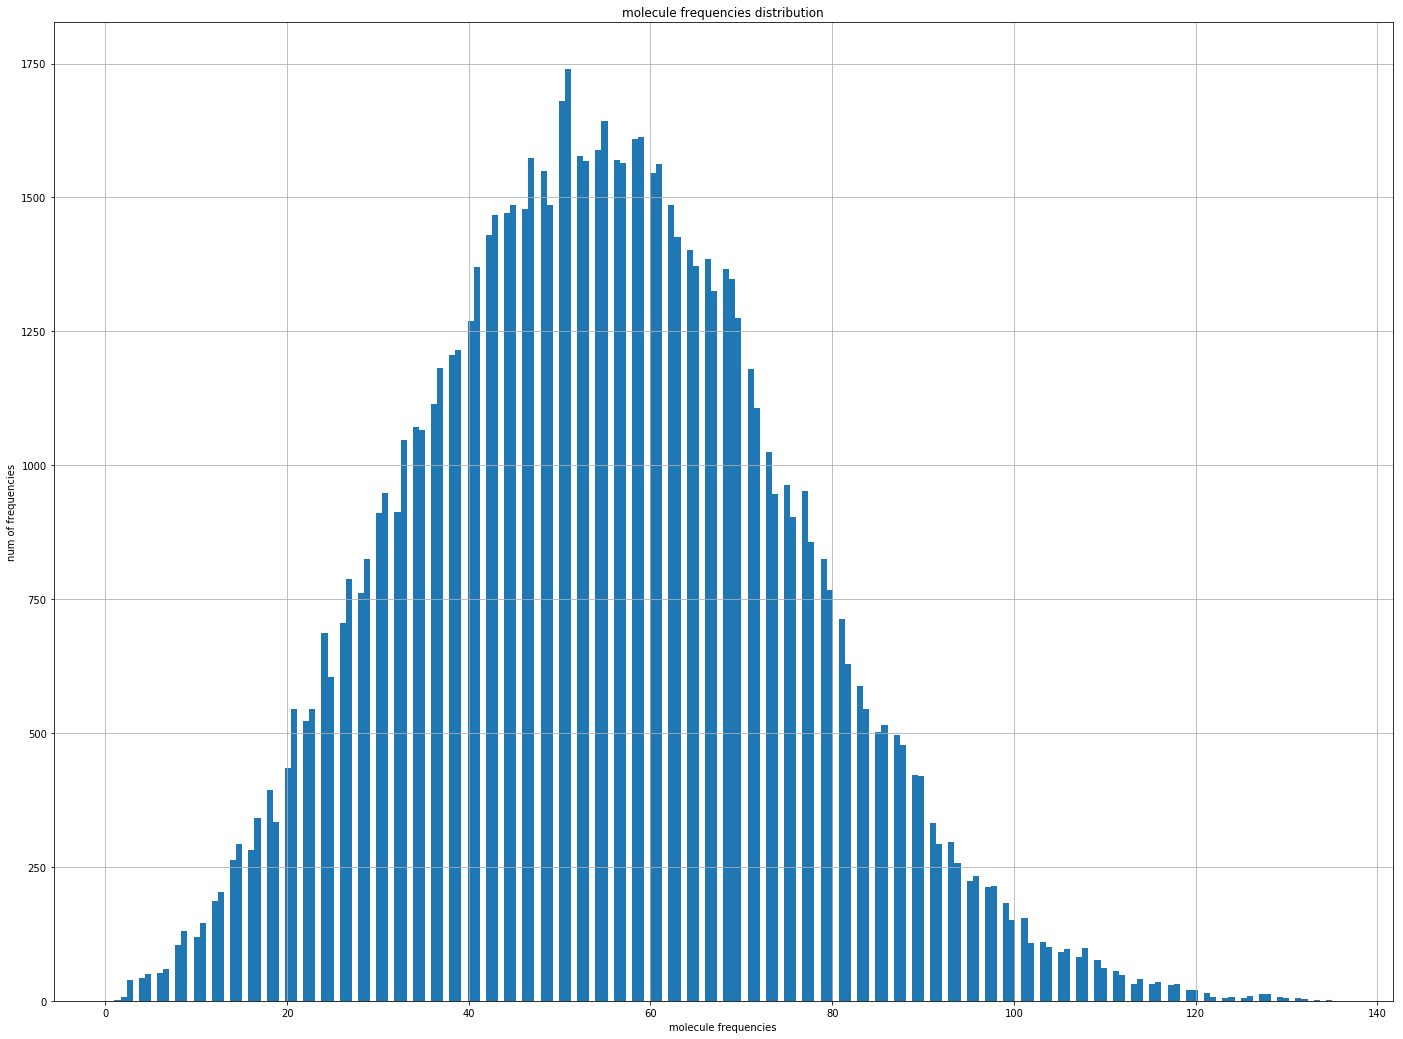

In [34]:
sorted_cnt_grouped_by_m_name_train_data['id'].hist(bins=200, figsize=(24, 18))
plt.title("molecule frequencies distribution")
plt.xlabel("molecule frequencies")
plt.ylabel("num of frequencies")

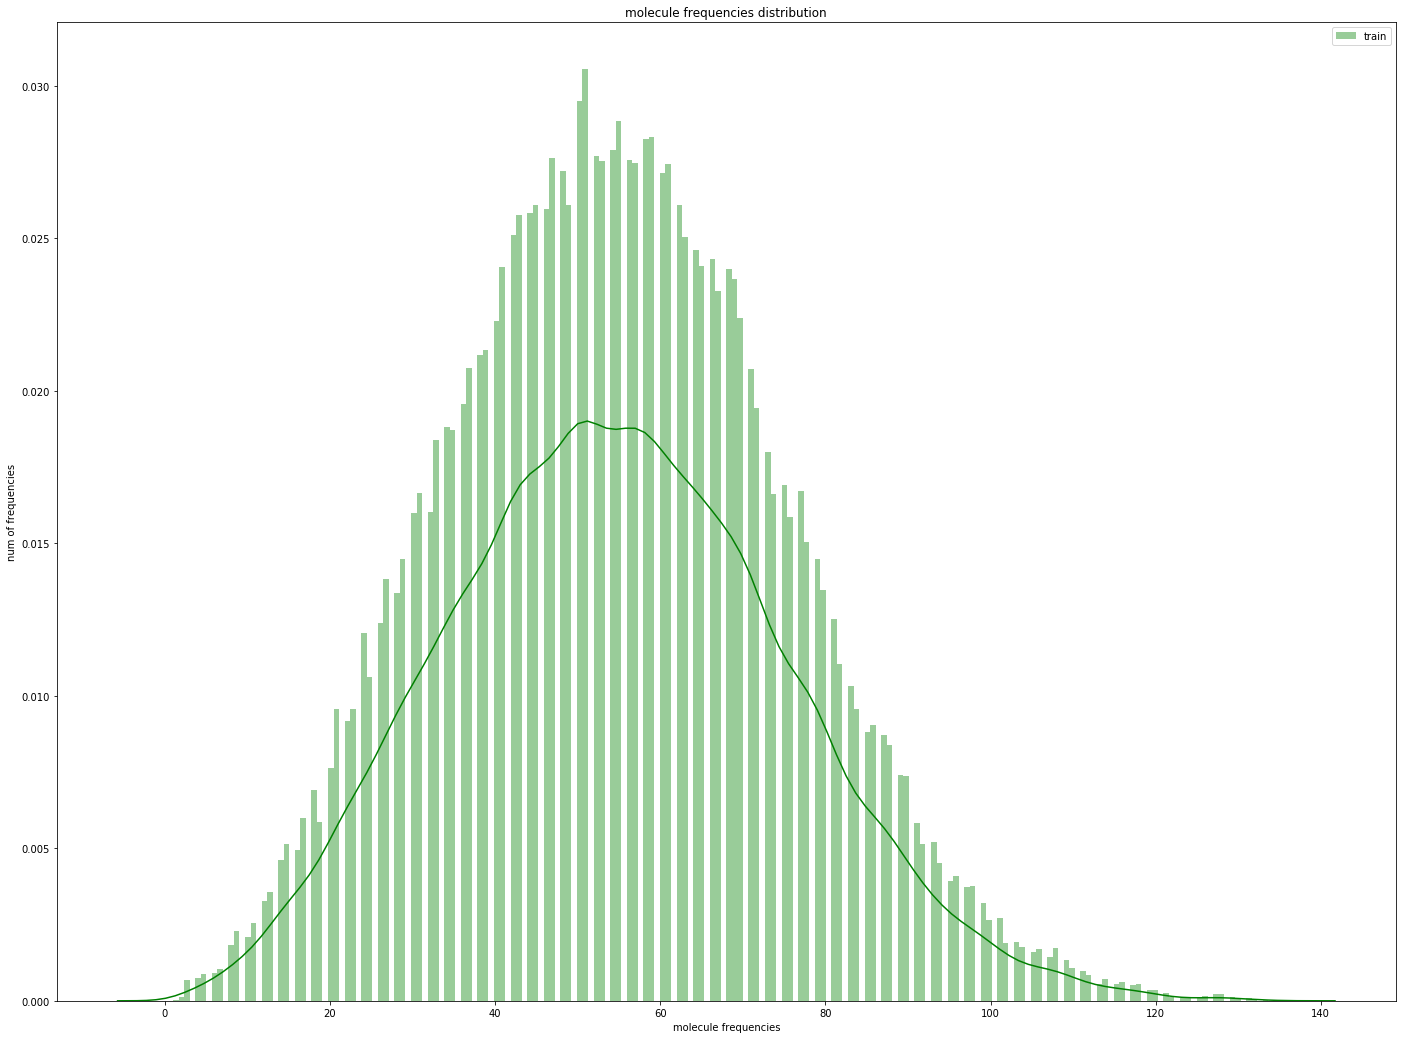

In [35]:
plt.figure(figsize=(24, 18))
features = train_df.columns.values
plt.title("molecule frequencies distribution")
sns.distplot(sorted_cnt_grouped_by_m_name_train_data['id'], color="green", kde=True, bins=200, label='train')
#sns.distplot(test_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.xlabel("molecule frequencies")
plt.ylabel("num of frequencies")
plt.legend()
plt.show()

In [36]:
any(train_df.isna())

True

In [38]:
len(train_df[train_df.isna()])

4658147

In [43]:
for column in train_df.columns:
    print("\ncolumn:", column)
    print("num_of_nan:", train_df.loc[train_df[column].isna(), column].value_counts())
    print("isna", any(train_df[column].isna()))


column: id
num_of_nan: Series([], Name: id, dtype: int64)
isna False

column: molecule_name
num_of_nan: Series([], Name: molecule_name, dtype: int64)
isna False

column: atom_index_0
num_of_nan: Series([], Name: atom_index_0, dtype: int64)
isna False

column: atom_index_1
num_of_nan: Series([], Name: atom_index_1, dtype: int64)
isna False

column: type
num_of_nan: Series([], Name: type, dtype: int64)
isna False

column: scalar_coupling_constant
num_of_nan: Series([], Name: scalar_coupling_constant, dtype: int64)
isna False
